In [2]:
import pandas as pd
import numpy as np

In [3]:
train_set = pd.read_csv('dataset/train.csv')
test_set = pd.read_csv('dataset/test.csv')

In [62]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
# drop Nan lines
features_col = ['Pclass','Age','Sex','Survived']
train =  train_set[features_col]
train = train[pd.notnull(train['Age'])]
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1}) # Convert Sex string to boolean values

# assign X, Y values
features_col = ['Pclass','Age','Sex']
X_train = train[features_col]
Y_train = train.Survived

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
## process test_set
# drop Nan lines
features_col = ['Pclass','Age','Sex']
test =  test_set[features_col]
test = test[pd.notnull(test['Age'])]
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1}) # Convert Sex string to boolean values

X_test = test[features_col]


In [76]:
## Make predictions for our model
y_predict = logreg.predict(X_test)

In [ ]:
# calculate accuracy
from sklearn import metrics
metrics.accuracy_score(Y_test,y_predict)

# Cross-validation testing

In [29]:
train_set = pd.read_csv('dataset/train.csv')
features_col = ['Pclass','Age','Sex','Survived','SibSp','Parch']
train =  train_set[features_col]
train = train[pd.notnull(train['Age'])]
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1}) # Convert Sex string to boolean values
#train['Embarked'] = train['Embarked'].map({'C':0,'Q':1,'S':2})
#train = train[pd.notnull(train['Embarked'])]  # Had null value


# assign X, Y values
features_col = ['Pclass','Age','Sex','SibSp','Parch']
X = train[features_col]
Y = train.Survived

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_predict = logreg.predict(X_test)

In [33]:
from sklearn import metrics
metrics.accuracy_score(Y_test,y_predict)

0.81005586592178769

In [40]:
confusion = metrics.confusion_matrix(Y_test,y_predict)
print confusion

[[87 16]
 [18 58]]


In [36]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [41]:
print TP
print FN
print FP
print TN

58
18
16
87


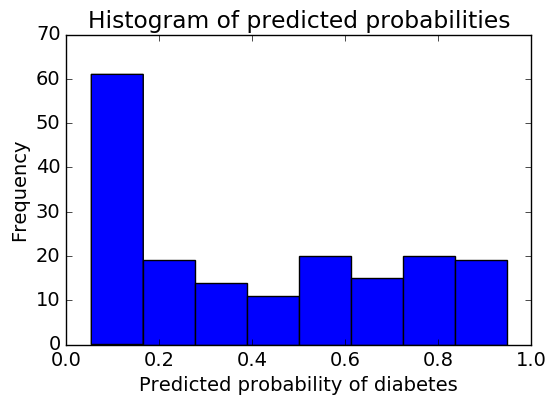

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

# histogram of predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

# K-NN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [75]:
y_predict = knn.predict(X_test)
metrics.accuracy_score(Y_test,y_predict)

0.71508379888268159

# Random-Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
forest = RandomForestClassifier()

In [88]:
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [93]:
metrics.accuracy_score(Y_test,apredict)

0.77653631284916202

In [91]:
apredict = forest.predict(X_test)

In [92]:
apredict

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0])